In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print(data.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
data.drop(['trestbps'], axis=1, inplace=True)


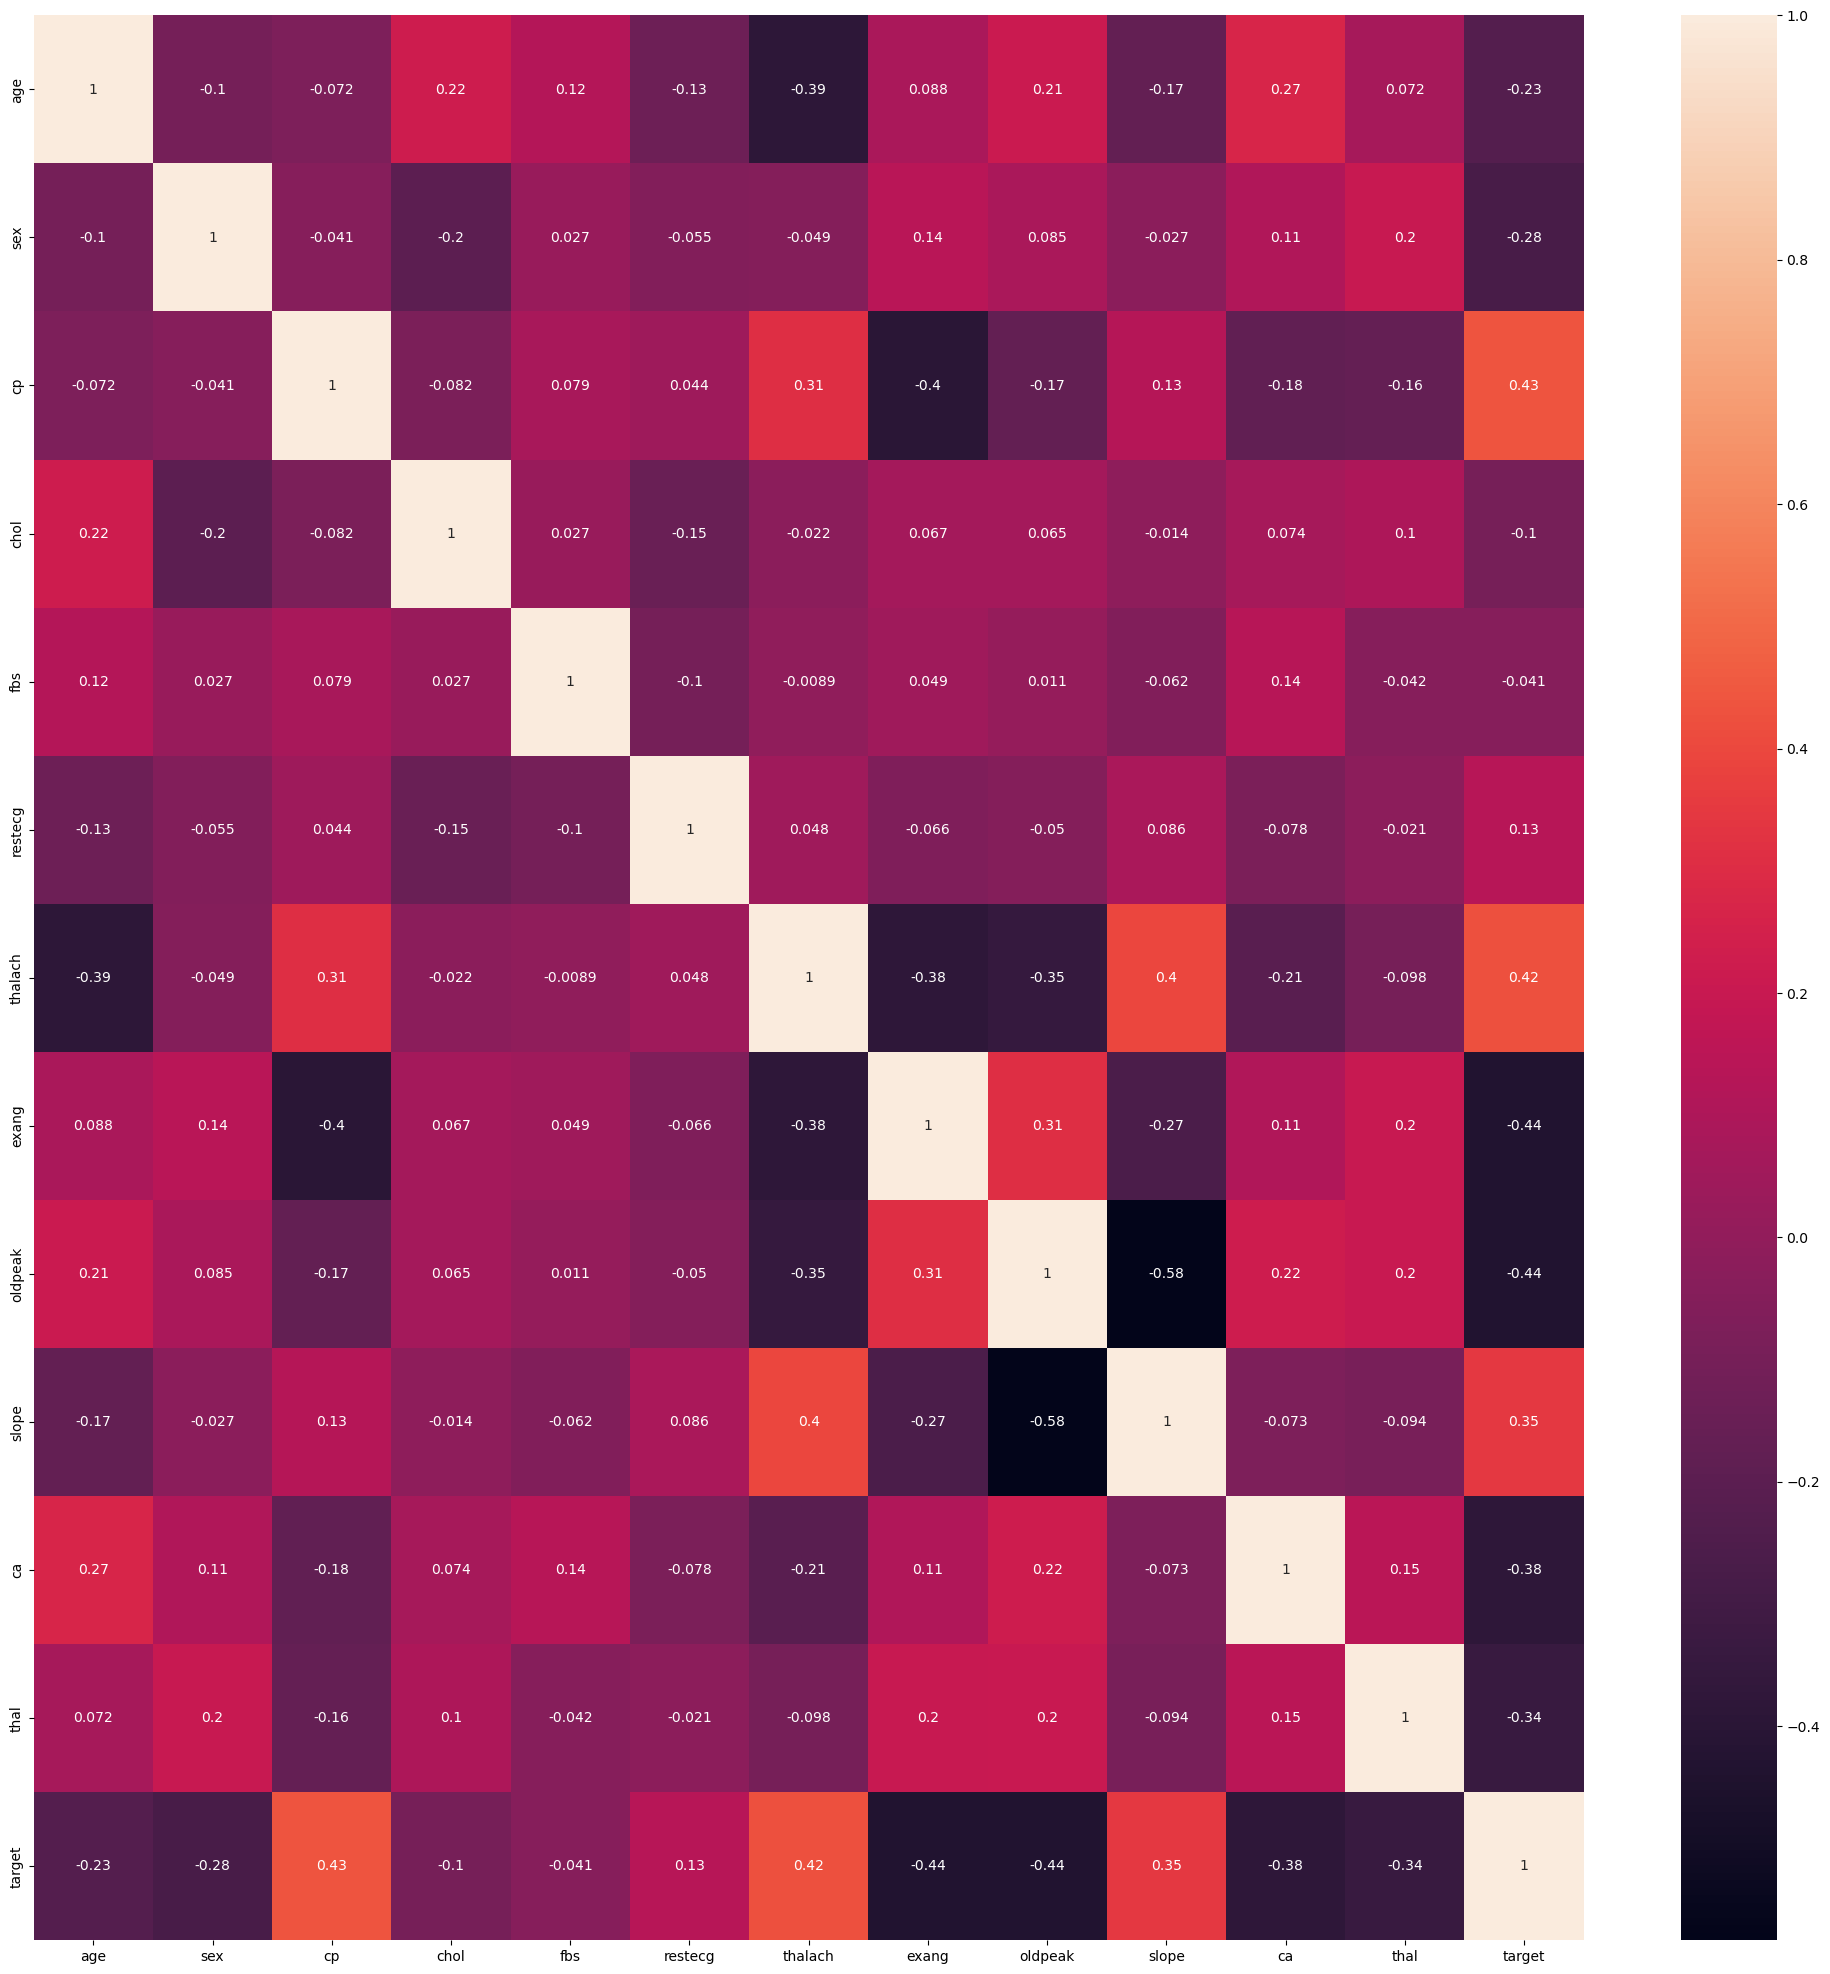

In [7]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
x= data.iloc[:,:-1]
y= data['target']

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state= 42)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)
model.fit(x_train_scaled, y_train)


LogisticRegression(C=0.1, max_iter=1000)

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Random Forest Accuracy:", rf.score(x_test, y_test) * 100)


Random Forest Accuracy: 98.53658536585365


In [44]:
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(100.0, 98.53658536585365)

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.8548780487804878


In [87]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8097560975609757


In [71]:
model.score(x_train,y_train)*100, model.score(x_test,y_test)*100

(86.95121951219512, 80.97560975609757)

In [50]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(x_train_scaled, y_train)
print(grid.best_params_, grid.best_score_)


{'C': 1} 0.8548780487804878


In [97]:
data.columns

Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Assuming your data is in a DataFrame called df


# Define column types
numeric_features = ['age', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

# Build pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train
pipeline.fit(x_train, y_train)

# Evaluate
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")


Train Accuracy: 0.86
Test Accuracy: 0.80
